<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Clustering%20and%20Unsupervised%20Learning/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

## 1. Understand Pricipal Component Analysis


**PCA Algorithm**


1.   Normalize the data to have a mean of 0 and standard deviation of 1.

> $\displaystyle x_j^{(i)}\leftarrow\displaystyle\frac{x_j^{(i)}-\mu_j}{\sigma_j}\quad$

>  $\displaystyle\mbox{where}\quad\quad\mu_j = \frac{1}{m}\sum_{i=1}^mx_j^{(i)}\quad\quad\mbox{and}\quad\quad\sigma_j^2=\frac{1}{m}\sum_{i=1}^m(x_j^{(i)}-\mu_j)^2$

2. Compute: 

> $\displaystyle\Sigma\quad=\quad\frac{1}{m}X^{T}X\quad=\quad\frac{1}{m}\sum_{i=1}^m{x^{(i)}}^Tx^{(i)}\quad\in\mathbb{R}^{n\times n}$

> Note: $\Sigma$ is a $n\times n$ matrix  $\in\mathbb{R}^{n\times n}$, and it is not a summation operator here.

3. Compute $u_1, ..., u_k\in\mathbb{R}^n$, the $k$ orthogonal principal eigenvectors of $\Sigma$, i.e. the orthogonal eigenvectors of the $k$ largest eigenvalues. 

4. Project the data on $\textrm{span}_\mathbb{R}(u_1,...,u_k)$


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12})
sns.set_style('whitegrid')

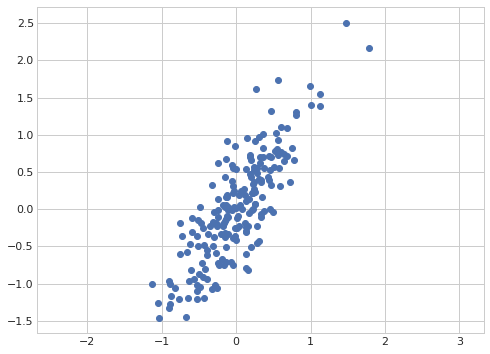

In [106]:
rng = np.random.RandomState(2)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T


plt.figure(1, figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()


In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [108]:
print("Components_:\n", pca.components_)
print("Explained variance:\n", pca.explained_variance_)

Components_:
 [[ 0.51517079  0.85708754]
 [-0.85708754  0.51517079]]
Explained variance:
 [0.67663501 0.05315297]


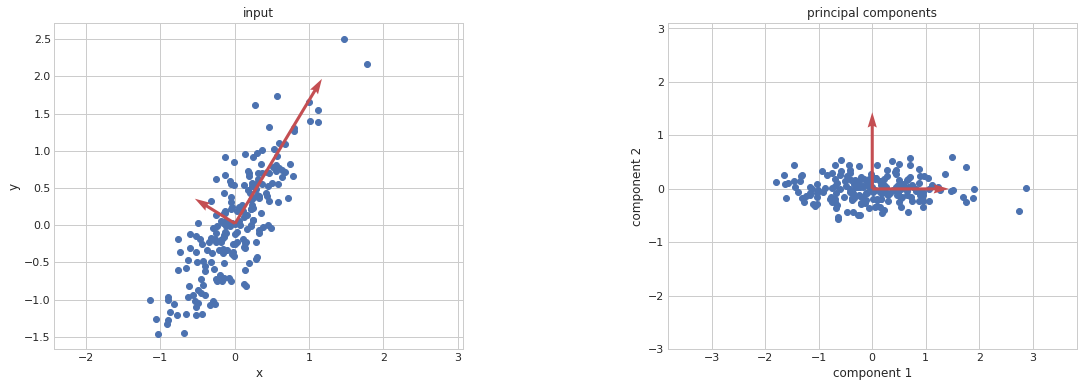

In [114]:
def draw_vector(v0, v1, ax=None):
    ax.quiver(v0[0], v0[1], v1[0], v1[1], color=['r','b','g'], scale=16)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.5)

# plot data
ax[0].scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) * 8
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1])
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))
plt.show()

## 2. Dimension Reduction for Visualization of Boston Dataset

### 2.1 Load Boston Dataset

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [12]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
print(bos.head())
print(bos.describe())

bos = bos.loc[bos["PRICE"] < 50.0]

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
             CRIM          ZN       INDUS  ...           B       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000

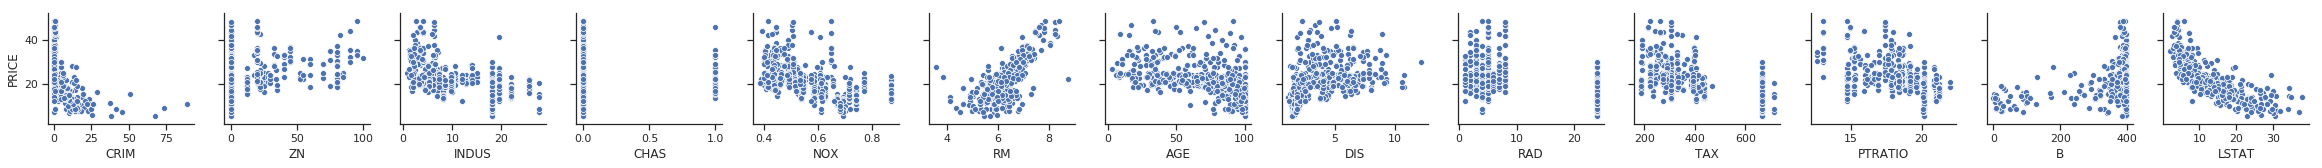

In [13]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(bos, 
                 x_vars=boston.feature_names,
                 y_vars=["PRICE"])
plt.show()

### 2.2. Dimension Reduction for Visualization

From the dataset description we understand that there are 13 features. We want to visualize the PRICE in a two-dimensional space, the PRICE is in y-axis, so we want to reduce multiple features into one-dimensional as x_axis.

***2.2.1 PCA 1***

We will reduce five features --  "CRIM","NOX","TAX","DIS","LSTAT" into one dimension, and visualize it with Price in a 2-D plot.


In [0]:
pca_features = ["CRIM","NOX","TAX","DIS","LSTAT"]
X = bos.loc[:, pca_features].values
y = bos.loc[:,["PRICE"]].values

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.64579306])

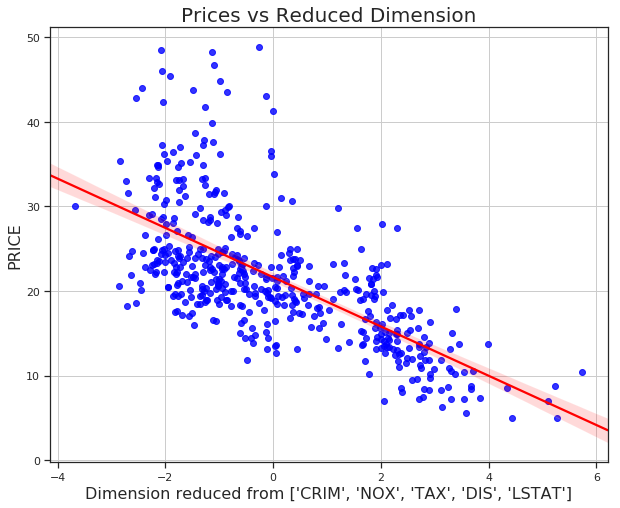

In [17]:
fig = plt.figure(1, figsize=(10,8))

ax = sns.regplot(x=X_pca, y=y.reshape(y.shape[0]), 
                 scatter_kws={"color": "blue"}, 
                 line_kws={"color": "red"})
ax.set_title( "Prices vs Reduced Dimension", fontsize=20 )
ax.set_ylabel("PRICE", fontsize=16)
ax.set_xlabel("Dimension reduced from %s" % pca_features, fontsize=16)
ax.grid(True)

plt.show()

***2.2.2 PCA 2***

Similarly we will reduce three features -- "RM","B","ZN" into one dimension, and visualize it with Price in a 2-D plot.

In [0]:
pca_features = ["RM","B","ZN"]
X = bos.loc[:, pca_features].values
y = bos.loc[:,["PRICE"]].values

sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.47197264])

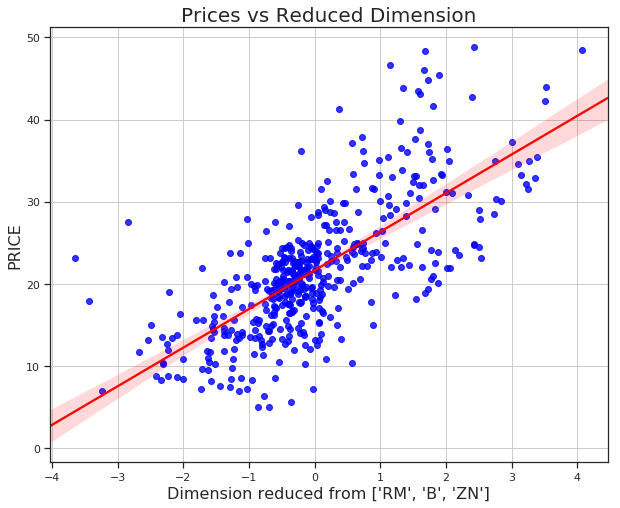

In [20]:
fig = plt.figure(1, figsize=(10,8))

ax = sns.regplot(x=X_pca, y=y.reshape(y.shape[0]), 
                 scatter_kws={"color": "blue"}, 
                 line_kws={"color": "red"})
ax.set_title( "Prices vs Reduced Dimension", fontsize=20 )
ax.set_ylabel("PRICE", fontsize=16)
ax.set_xlabel("Dimension reduced from %s" % pca_features, fontsize=16)
ax.grid(True)

plt.show()